<a href="https://colab.research.google.com/github/CarlosOliveri/Detector-de-chapas/blob/master/Analisis_Resultados_Detector_Chapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)


In [ ]:
%cd /content/
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
%cd /content/
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom',path='/content/drive/MyDrive/Yolov5/best.pt', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
#im = '/content/Screem_Cam_Fiuna.png'  # file, Path, PIL.Image, OpenCV, nparray, list
#results = model(im)  # inference
#results.pandas()  # or .show(), .save(), .crop(), .pandas(), etc.

/content


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 625x1300 1 Chapa_Vehiculos
Speed: 51.4ms pre-process, 2981.3ms inference, 30.6ms NMS per image at shape (1, 3, 320, 640)

In [ ]:
import os
conf = 0.9
validation_path = '/content/drive/MyDrive/yolov4-darknet/Imagenes/validation'
images = os.listdir(validation_path)
cont = 0
bboxs = []
for image in images:
  #print(validation_path+'/'+image)
  img_path = validation_path+'/'+image
  img = cv2.imread(img_path)
  cont+=1
  print('\rProcesando imagen '+str(cont), end="", flush=True)
  results = model(img)
  crop = results.crop(save=False)

  for k in crop:
    if k['conf']>conf:
      bboxs.append(k['box'])
coord = []
print('Cargando etiquetas de Salida en Lista', end="", flush=True)
for bbox in bboxs:
  coord.append(bbox)
print('Terminado')

Terminado


In [ ]:
len(coord),coord[0]

(289, [tensor(0.), tensor(317.77069), tensor(65.39479), tensor(377.13690)])

In [ ]:
val_txts_path = '/content/drive/MyDrive/yolov4-darknet/Etiquetas/validation'
txts = os.listdir(val_txts_path)
Y = []
for txt in txts:
  path = val_txts_path+'/'+txt
  file = open(path,'r')
  lines = file.readlines()
  for line in lines:
    Y.append(line)
len(Y)

405

In [ ]:
cont = 0
error = 0
error_list=[]
for image in images:
  img_path = validation_path+'/'+image
  img = cv2.imread(img_path)
  cont+=1
  print('\rProcesando imagen '+str(cont), end="", flush=True)
  results = model(img)
  crop = results.crop(save=False)
  lines=[]
  path_txt = val_txts_path+'/'+image.split('.')[0]+'.txt'
  file = open(path_txt,'r')
  lines = file.readlines()
  file.close()
  for n in crop:
    if n['conf']<0.70:
      crop.remove(n)

  if len(lines) != len(crop):
    error += 1
    error_list.append(image)
    print('\nError numero '+str(error)+' en la prediccion, predicciones esperadas: '+str(len(lines))+', predicciones obtenidas: '+str(len(crop)))
    print(image+', '+str(lines))

Procesando imagen 4
Error numero 1 en la prediccion, predicciones esperadas: 3, predicciones obtenidas: 2
0170ea8e1a33375a.jpg, ['0 0.010742 0.142753 0.021484 0.024890\n', '0 0.651367 0.706442 0.142578 0.142020\n', '0 0.924805 0.195461 0.042969 0.039531\n']
Procesando imagen 9
Error numero 2 en la prediccion, predicciones esperadas: 2, predicciones obtenidas: 1
0787b0fa95f545a5.jpg, ['0 0.088867 0.207814 0.027344 0.010193\n', '0 0.520996 0.604757 0.149414 0.090600\n']
Procesando imagen 13
Error numero 3 en la prediccion, predicciones esperadas: 2, predicciones obtenidas: 1
0c756c9366a8cb10.jpg, ['0 0.234863 0.505859 0.028320 0.014323\n', '0 0.680176 0.792969 0.118164 0.075521\n']
Procesando imagen 15
Error numero 4 en la prediccion, predicciones esperadas: 1, predicciones obtenidas: 2
09453a7c716a9ef3.jpg, ['0 0.559570 0.855469 0.152344 0.067708\n']
Procesando imagen 16
Error numero 5 en la prediccion, predicciones esperadas: 2, predicciones obtenidas: 1
0ee91c4938b6e7ee.jpg, ['0 0.012

In [ ]:
file = open('/content/drive/MyDrive/yolov4-darknet/Etiquetas/validation/03b7b71e1ffcb7a8.txt','r')
lines = file.readlines()
lines

['0 0.031250 0.505124 0.062500 0.084919\n']

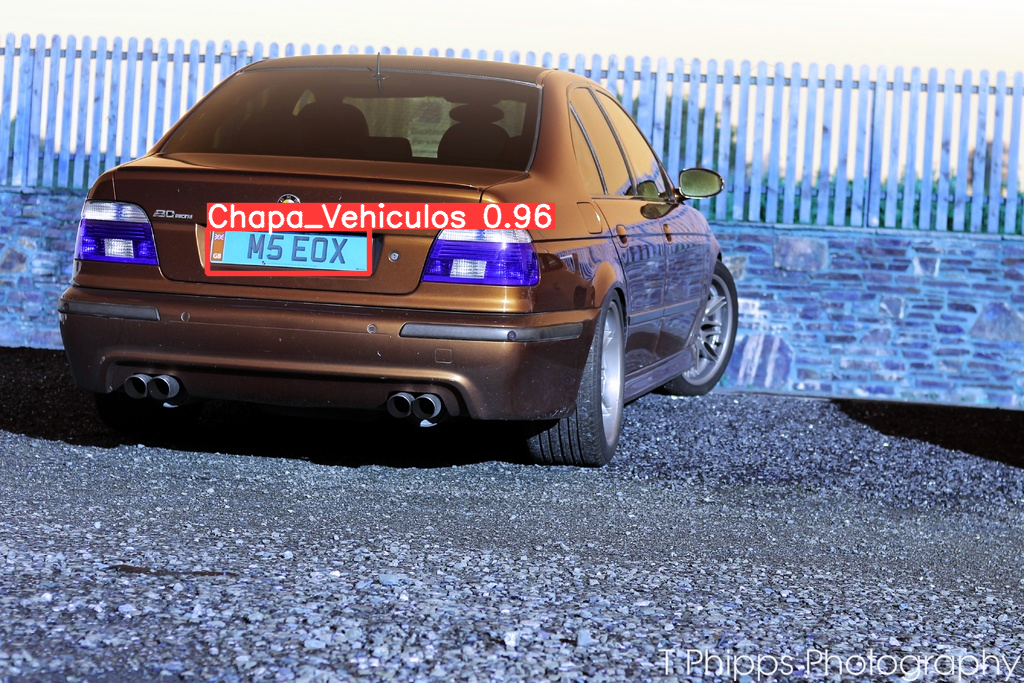

In [ ]:
img = validation_path+'/'+error_list[-1]
img = cv2.imread(img)
predict = model(img)
predict.show()

In [ ]:
for k in range(len(Y)):
  Y[k] = Y[k][0:-1]
  Y [k] = Y[k].split(' ')[1:]